In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, accuracy_score

data = pd.read_csv("/content/age_gender.csv")
df = data.drop('img_name', axis=1)

def basic_eda(df):
    print("\nShape:")
    print(df.shape)

    print("\nNumber of null values:")
    print(df.isnull().sum())

    print("\nValue counts:")
    for column in df.select_dtypes(include=['object', 'category']):
        print(f"\n{column.capitalize()}:")
        print(df[column].value_counts())

basic_eda(df)



Shape:
(8203, 4)

Number of null values:
age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

Value counts:

Pixels:
pixels
31 25 28 27 24 20 16 11 14 24 25 17 15 16 11 17 49 77 99 109 120 129 132 137 147 157 162 164 163 155 149 138 130 111 85 70 63 51 38 31 29 24 21 19 19 17 17 17 37 27 26 27 21 21 20 17 20 28 29 22 16 17 10 16 56 82 104 119 128 138 141 144 152 162 164 167 166 162 158 148 136 128 107 83 66 48 33 32 32 27 28 27 24 22 21 21 51 47 33 27 20 23 22 19 23 27 24 19 18 16 11 25 65 84 104 123 136 147 150 155 161 162 165 167 168 167 165 161 156 141 120 86 71 56 41 39 41 40 38 34 29 24 20 19 50 46 39 28 22 25 30 25 20 17 19 17 15 12 12 29 80 94 106 130 138 147 150 154 160 164 167 169 175 179 179 168 142 122 118 106 86 73 60 55 55 53 51 45 36 28 21 20 55 42 36 28 25 25 34 28 16 10 13 15 14 14 12 34 79 90 104 130 136 145 150 154 161 167 169 175 174 164 131 100 77 82 90 91 81 77 73 72 66 61 59 52 45 37 26 22 58 40 31 30 28 26 31 23 15 12 12 13 12 15 12 40 84 10

In [ ]:
columns = ["age", "gender", "ethnicity"]
y = df.drop("pixels", axis=1)
X = df.drop(columns, axis=1)

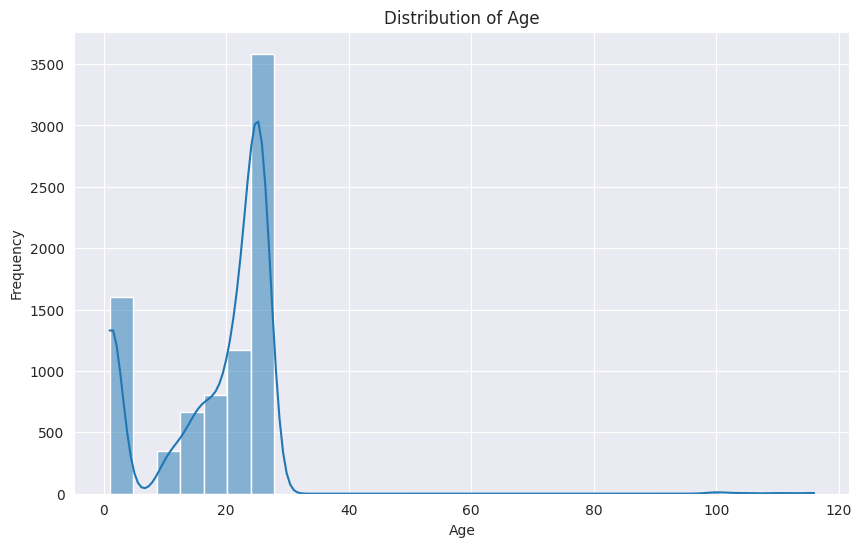

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

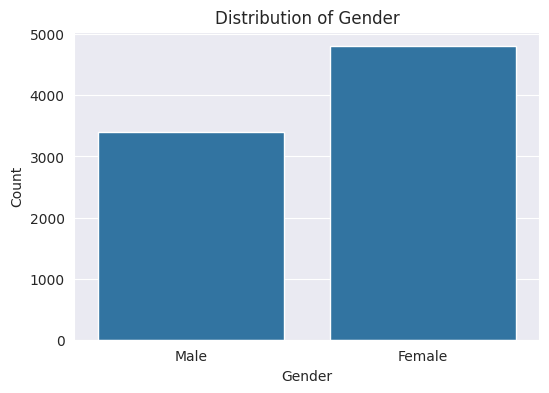

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

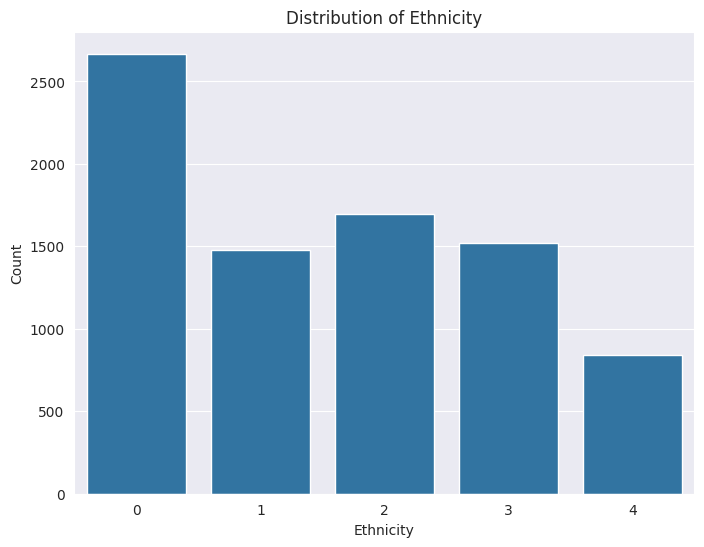

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ethnicity', data=df)
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

In [ ]:
df['pixel_mean'] = df['pixels'].apply(lambda x: np.mean([int(i) for i in x.split()]))
df['pixel_std'] = df['pixels'].apply(lambda x: np.std([int(i) for i in x.split()]))

# Data Preprocessing
df_encoded = pd.get_dummies(df, columns=['ethnicity'])

In [ ]:
X = df_encoded.drop(['age', 'gender', 'pixels'], axis=1)
y_age = df_encoded['age']
y_gender = df_encoded['gender']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(
    X_scaled, y_age, y_gender, test_size=0.2, random_state=42)

Models

In [ ]:
age_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

gender_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

def evaluate_age_models(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        mean_cv_mae = -scores.mean()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        test_mae = mean_absolute_error(y_test, predictions)
        model_scores[name] = (mean_cv_mae, test_mae)

    best_age_model = min(model_scores, key=lambda k: model_scores[k][1])
    return best_age_model

def evaluate_gender_models(models, X_train, y_train, X_test, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        model_scores[name] = accuracy

    best_gender_model = max(model_scores, key=model_scores.get)
    return best_gender_model

# Age prediction evaluation
print("Age Prediction Models Evaluation:")
best_age_model = evaluate_age_models(age_models, X_train, y_age_train, X_test, y_age_test)
print("Best Age Prediction Model:", best_age_model)

# Gender prediction evaluation
print("\nGender Prediction Models Evaluation:")
best_gender_model = evaluate_gender_models(gender_models, X_train, y_gender_train, X_test, y_gender_test)
print("Best Gender Prediction Model:", best_gender_model)

Age Prediction Models Evaluation:
Best Age Prediction Model: Support Vector Regressor

Gender Prediction Models Evaluation:
Best Gender Prediction Model: Logistic Regression


Fine Tune

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


svr_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.5, 1]
}
svr_grid = GridSearchCV(SVR(), param_grid=svr_param_grid, scoring='neg_mean_absolute_error', cv=5)
svr_grid.fit(X_train, y_age_train)
best_svr_model = svr_grid.best_estimator_


In [ ]:
logistic_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
logistic_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=logistic_param_grid, scoring='accuracy', cv=5)
logistic_grid.fit(X_train, y_gender_train)
best_logistic_model = logistic_grid.best_estimator_

In [ ]:
logistic_coefficients = best_logistic_model.coef_
svr_predictions = best_svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_age_test, svr_predictions)

logistic_predictions = best_logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_gender_test, logistic_predictions)

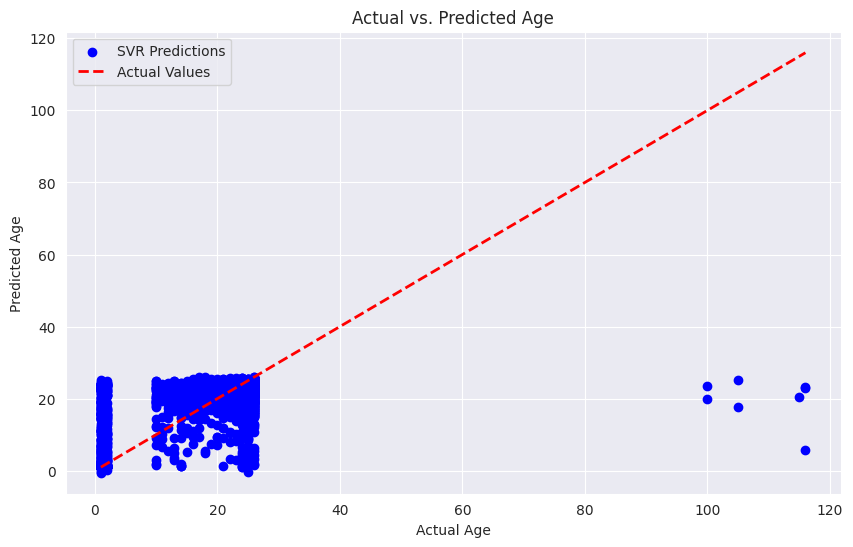

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_age_test, svr_predictions, color='blue', label='SVR Predictions')
plt.plot([y_age.min(), y_age.max()], [y_age.min(), y_age.max()], 'k--', lw=2, color='red', label='Actual Values')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age')
plt.legend()
plt.show()

Prediction

In [ ]:
def get_user_inputs():
    pixel_mean = float(input("Enter the pixel mean value: "))
    pixel_std = float(input("Enter the pixel standard deviation value: "))

    ethnicity_0 = int(input("Enter ethnicity 0 (1 for True, 0 for False): "))
    ethnicity_1 = int(input("Enter ethnicity 1 (1 for True, 0 for False): "))
    ethnicity_2 = int(input("Enter ethnicity 2 (1 for True, 0 for False): "))
    ethnicity_3 = int(input("Enter ethnicity 3 (1 for True, 0 for False): "))
    ethnicity_4 = int(input("Enter ethnicity 4 (1 for True, 0 for False): "))

    user_inputs = pd.DataFrame({
        'pixel_mean': [pixel_mean],
        'pixel_std': [pixel_std],
        'ethnicity_0': [ethnicity_0],
        'ethnicity_1': [ethnicity_1],
        'ethnicity_2': [ethnicity_2],
        'ethnicity_3': [ethnicity_3],
        'ethnicity_4': [ethnicity_4]
    })

    return user_inputs

user_inputs = get_user_inputs()

scaler = StandardScaler()
user_inputs_scaled = scaler.fit_transform(user_inputs)

user_age_prediction = best_svr_model.predict(user_inputs_scaled)

user_gender_prediction = best_logistic_model.predict(user_inputs_scaled)

gender_str = "Male" if user_gender_prediction == 1 else "Female"
print(f"\nPredicted Gender: {gender_str}")
print(f"Predicted Age: {user_age_prediction[0]:.2f} years")

Enter the pixel mean value: 125.5
Enter the pixel standard deviation value: 18.6
Enter ethnicity 0 (1 for True, 0 for False): 1
Enter ethnicity 1 (1 for True, 0 for False): 0
Enter ethnicity 2 (1 for True, 0 for False): 0
Enter ethnicity 3 (1 for True, 0 for False): 0
Enter ethnicity 4 (1 for True, 0 for False): 0

Predicted Gender: Male
Predicted Age: 19.27 years
